In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [111]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

In [112]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [74]:
df=pd.read_csv('DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [75]:
np.sum(df.isna())

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [76]:
df['Customer Zipcode'] = df['Customer Zipcode'].fillna(0)
df['Order Zipcode'] = df['Order Zipcode'].fillna(0)

In [77]:
df['Customer Fname'] = df['Customer Fname'].fillna("NotDetermined")
df['Customer Full Name'] = df['Customer Fname'].astype(str) + df['Customer Lname'].astype(str)

In [78]:
dfData=df.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Product Description','Product Image','Order Zipcode','Customer Zipcode'],axis=1)
dfData.shape

(180519, 44)

In [79]:
dfData.columns = [col.lower().replace(' ', '_') for col in dfData.columns]
dfData.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)
dfData.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_id', 'customer_segment', 'customer_state',
       'department_id', 'department_name', 'latitude', 'longitude', 'market',
       'order_city', 'order_country', 'order_customer_id',
       'order_date_dateorders', 'order_id', 'order_item_cardprod_id',
       'order_item_discount', 'order_item_discount_rate', 'order_item_id',
       'order_item_product_price', 'order_item_profit_ratio',
       'order_item_quantity', 'sales', 'order_item_total',
       'order_profit_per_order', 'order_region', 'order_state', 'order_status',
       'product_card_id', 'product_category_id', 'product_name',
       'product_price', 'shipping_date_dateorders', 'shipping_mode',
       'customer_full_name'],
      dtype='object')

In [80]:
Delivery=dfData.groupby('delivery_status')
Market = dfData.groupby('market') 
Region = dfData.groupby('order_region')
Customer=dfData.groupby('customer_segment')
Category=dfData.groupby('category_name')
Shipping=dfData.groupby('shipping_mode')
Region=dfData.groupby('order_region')

In [122]:
print(Region)

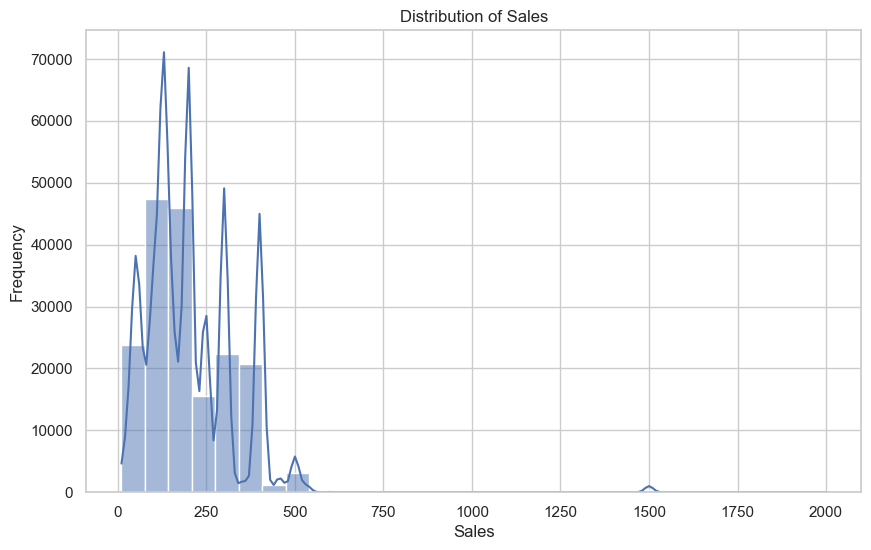

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfData, x='sales', bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [82]:
customer_segment_counts = dfData['customer_segment'].value_counts()
customer_segment_counts

Consumer       93504
Corporate      54789
Home Office    32226
Name: customer_segment, dtype: int64

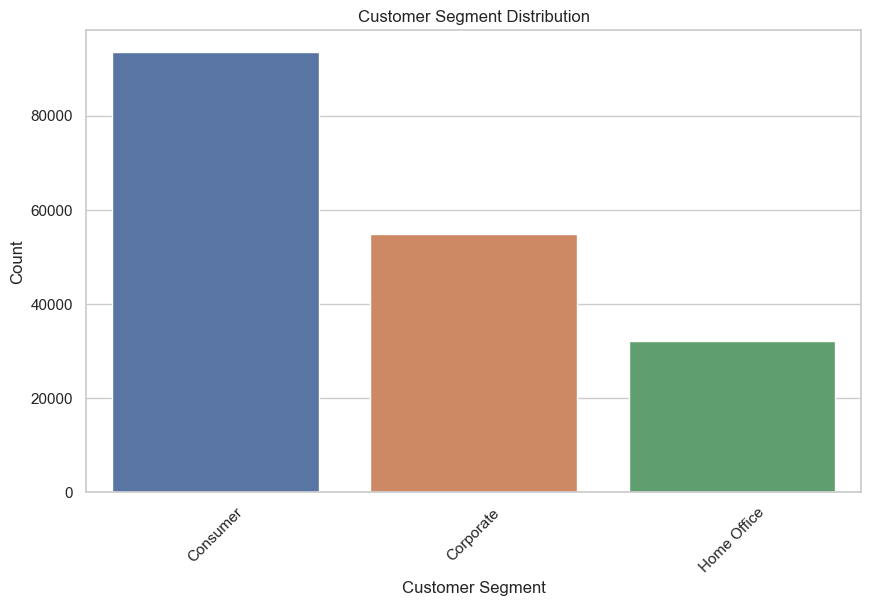

In [83]:
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_segment_counts.index, y=customer_segment_counts.values)
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

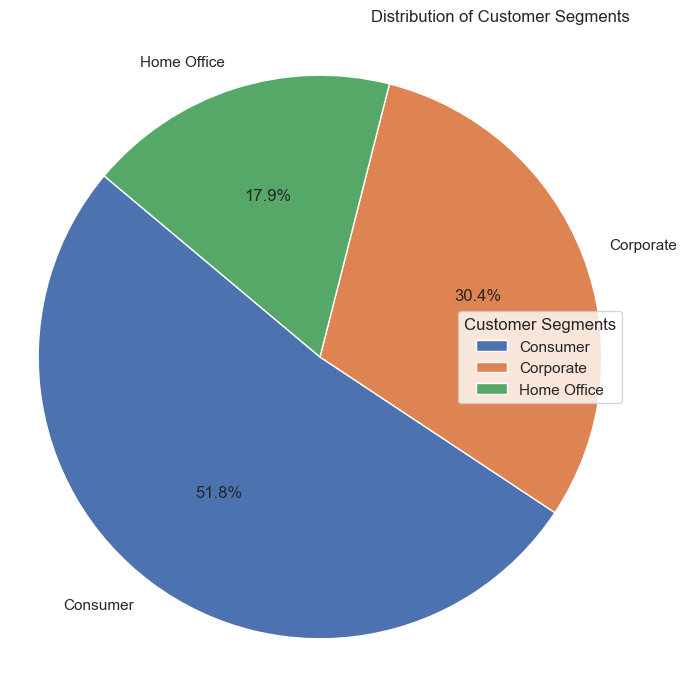

In [124]:
plt.figure(figsize=(8, 8))
plt.pie(customer_segment_counts, labels=customer_segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customer Segments',loc='Right', pad=20)
plt.axis('equal')
plt.legend(customer_segment_counts.index, title='Customer Segments', loc='right')
plt.show()

In [85]:
market_counts = dfData['market'].value_counts()
market_counts

LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: market, dtype: int64

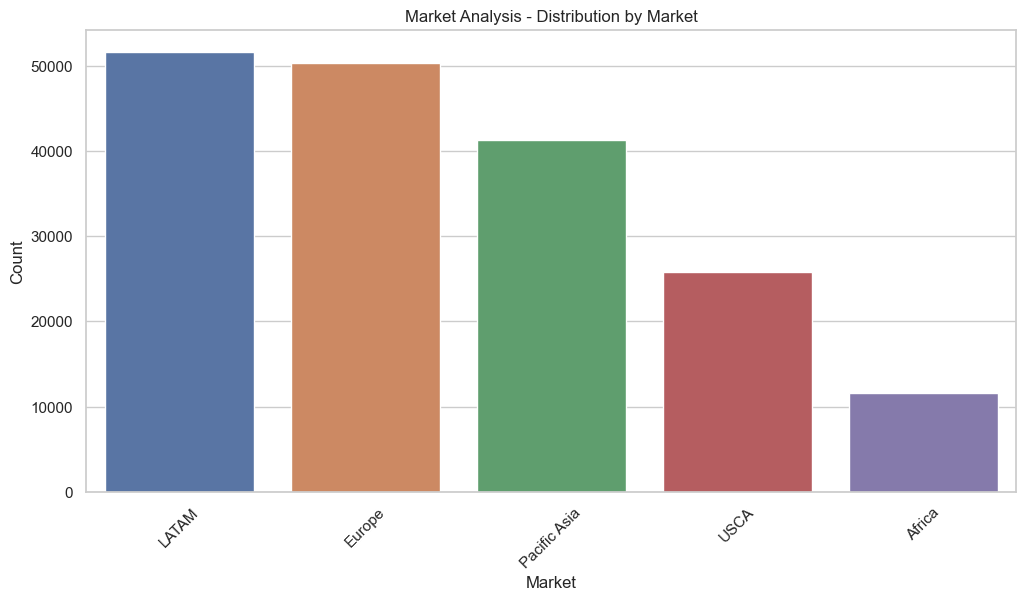

In [86]:
plt.figure(figsize=(12, 6))
sns.barplot(x=market_counts.index, y=market_counts.values)
plt.title('Market Analysis - Distribution by Market')
plt.xlabel('Market')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


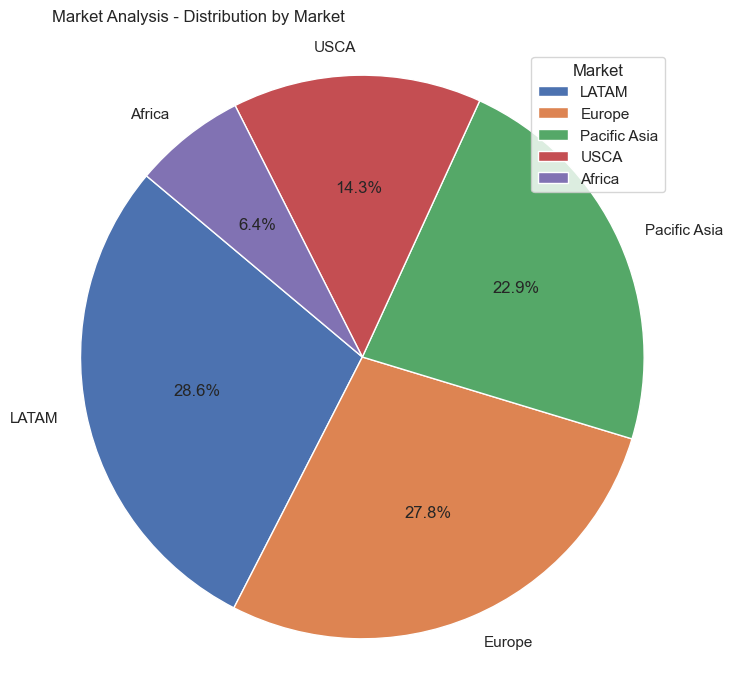

In [87]:
plt.figure(figsize=(8, 8))
plt.pie(market_counts, labels=market_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Market Analysis - Distribution by Market', loc='left', pad=20)
plt.axis('equal') 
plt.legend(market_counts.index, title='Market', loc='best')
plt.show()

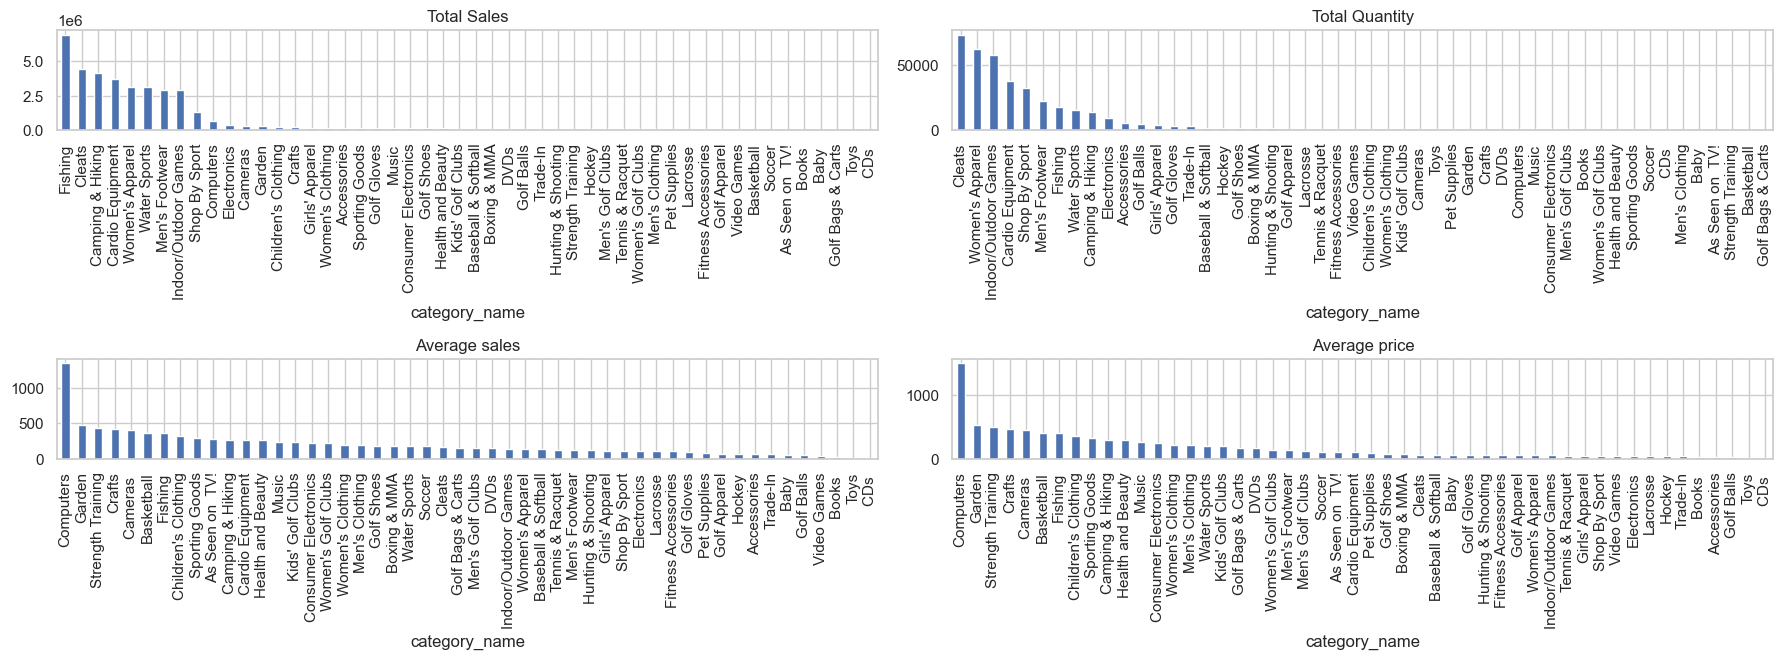

In [88]:
plt.figure(figsize=(15,17))
plt.subplot(6, 2, 1)
Category['sales'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Total Sales")

plt.subplot(6, 2, 2)
Category['order_item_quantity'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Total Quantity")

plt.subplot(6, 2, 3)
Category['sales_per_customer'].mean().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Average sales")

plt.subplot(6, 2, 4)
Category['product_price'].mean().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Average price")

plt.tight_layout()
plt.show()

In [89]:
delivery_status_data = dfData['delivery_status']
delivery_status_summary = delivery_status_data.value_counts()
delivery_status_summary

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: delivery_status, dtype: int64

Text(0, 0.5, 'Count')

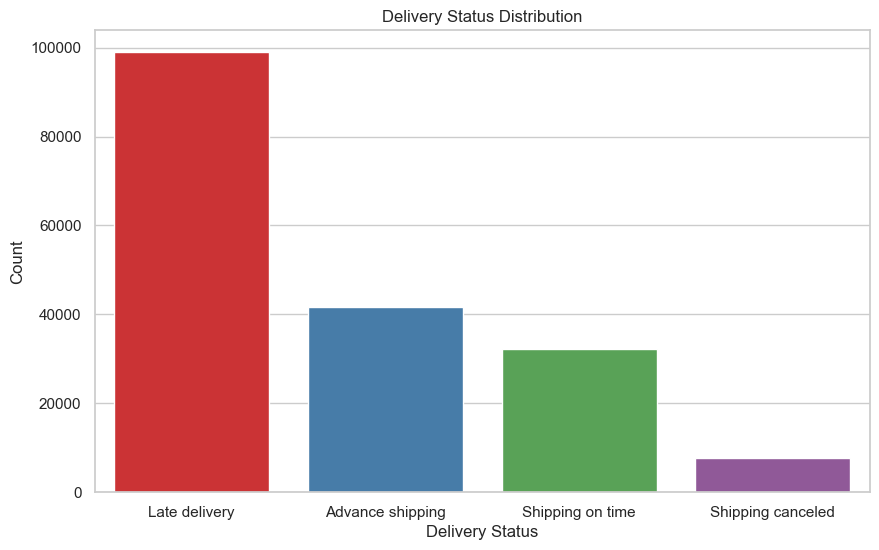

In [52]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(data=dfData, x='delivery_status', order=delivery_status_summary.index, palette='Set1')
plt.title('Delivery Status Distribution')
plt.xlabel('Delivery Status')
plt.ylabel('Count')

In [90]:
late_deliveries = dfData[dfData['delivery_status'] == 'Late delivery']
late_deliveries

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date_dateorders,shipping_mode,customer_full_name
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.750000,1/18/2018 12:27,Standard Class,IreneLuna
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,Eastern Asia,Guangdong,COMPLETE,1360,73,Smart watch,327.750000,1/15/2018 10:42,First Class,ConstanceTerrell
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,Eastern Asia,Guangdong,PROCESSING,1360,73,Smart watch,327.750000,1/15/2018 10:21,First Class,EricaStevens
8,CASH,3,2,133.720001,278.589996,Late delivery,1,73,Sporting Goods,Caguas,...,Eastern Asia,Guangdong,CLOSED,1360,73,Smart watch,327.750000,1/16/2018 10:00,Second Class,NicholeOlsen
9,CASH,2,1,132.149994,275.309998,Late delivery,1,73,Sporting Goods,San Ramon,...,Eastern Asia,Guangdong,CLOSED,1360,73,Smart watch,327.750000,1/15/2018 9:39,First Class,OprahDelacruz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180507,PAYMENT,5,2,50.110001,347.980011,Late delivery,1,45,Fishing,Philadelphia,...,Southeast Asia,Th? Dô Hà N?i,PAYMENT_REVIEW,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/21/2016 9:16,Second Class,MarySmith
180508,DEBIT,4,2,85.000000,339.980011,Late delivery,1,45,Fishing,Waipahu,...,Eastern Asia,Hubei,COMPLETE,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/20/2016 7:10,Second Class,RichardFuentes
180512,DEBIT,6,4,86.400002,319.980011,Late delivery,1,45,Fishing,Caguas,...,Eastern Asia,Sichuan,COMPLETE,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/22/2016 6:07,Standard Class,MaryMadden
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,Eastern Asia,Osaka,COMPLETE,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/19/2016 1:34,Second Class,RonaldClark


In [91]:
delivery_status_data = dfData['delivery_status']
shipping_mode_data = dfData['shipping_mode']

In [92]:
cross_tab = pd.crosstab(shipping_mode_data, delivery_status_data)
cross_tab

delivery_status,Advance shipping,Late delivery,Shipping canceled,Shipping on time
shipping_mode,,,,
First Class,0,26513,1301,0
Same Day,0,4454,444,4839
Second Class,0,26987,1410,6819
Standard Class,41592,41023,4599,20538


In [93]:
cross_tab_percent = cross_tab.div(cross_tab.sum(1), axis=0) * 100
cross_tab_percent

delivery_status,Advance shipping,Late delivery,Shipping canceled,Shipping on time
shipping_mode,,,,
First Class,0.000000,95.322499,4.677501,0.000000
Same Day,0.000000,45.743042,4.559926,49.697032
Second Class,0.000000,76.632781,4.003862,19.363358
Standard Class,38.599748,38.071683,4.268134,19.060435


Text(0, 0.5, 'Percentage')

<Figure size 1200x800 with 0 Axes>

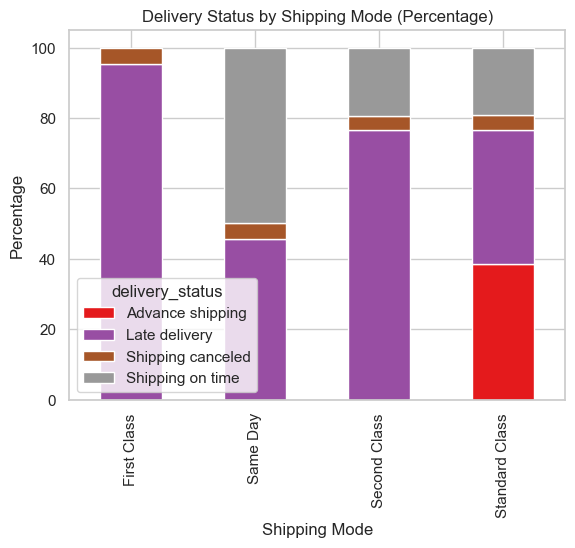

In [116]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
cross_tab_percent.plot(kind="bar", stacked=True, colormap='Set1')
plt.title('Delivery Status by Shipping Mode (Percentage)')
plt.xlabel('Shipping Mode')
plt.ylabel('Percentage')

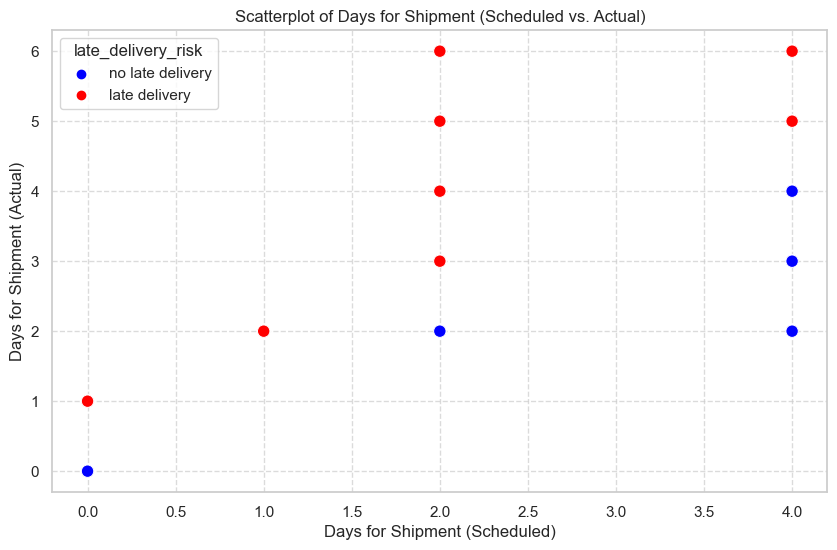

In [95]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
dfData['late_delivery_risk'] = dfData['late_delivery_risk'].map({0: 'no late delivery', 1: 'late delivery'})

palette = {'no late delivery': 'blue', 'late delivery': 'red'}

scatter = sns.scatterplot(x="days_for_shipment_scheduled", y="days_for_shipping_real", hue="late_delivery_risk", data=dfData, palette=palette, s=80)
plt.title('Scatterplot of Days for Shipment (Scheduled vs. Actual)')
plt.xlabel('Days for Shipment (Scheduled)')
plt.ylabel('Days for Shipment (Actual)')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [96]:
train_Data = dfData.copy()

In [97]:
train_Data['late_delivery']=np.where(train_Data['delivery_status'] == 'Late delivery', 1, 0) 

In [98]:
train_Data.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,...,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date_dateorders,shipping_mode,customer_full_name,late_delivery
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,no late delivery,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class,CallyHolloway,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,late delivery,73,Sporting Goods,Caguas,...,Rajastán,PENDING,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class,IreneLuna,1
2,CASH,4,4,-247.779999,309.720001,Shipping on time,no late delivery,73,Sporting Goods,San Jose,...,Rajastán,CLOSED,1360,73,Smart watch,327.75,1/17/2018 12:06,Standard Class,GillianMaldonado,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,no late delivery,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,1360,73,Smart watch,327.75,1/16/2018 11:45,Standard Class,TanaTate,0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,no late delivery,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,1/15/2018 11:24,Standard Class,OrliHendricks,0


In [99]:
train_data=train_Data.drop(['delivery_status','late_delivery_risk'], axis=1)

In [100]:
train_data.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,...,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date_dateorders,shipping_mode,customer_full_name,late_delivery
0,DEBIT,3,4,91.250000,314.640015,73,Sporting Goods,Caguas,Puerto Rico,20755,...,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class,CallyHolloway,0
1,TRANSFER,5,4,-249.089996,311.359985,73,Sporting Goods,Caguas,Puerto Rico,19492,...,Rajastán,PENDING,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class,IreneLuna,1
2,CASH,4,4,-247.779999,309.720001,73,Sporting Goods,San Jose,EE. UU.,19491,...,Rajastán,CLOSED,1360,73,Smart watch,327.75,1/17/2018 12:06,Standard Class,GillianMaldonado,0
3,DEBIT,3,4,22.860001,304.809998,73,Sporting Goods,Los Angeles,EE. UU.,19490,...,Queensland,COMPLETE,1360,73,Smart watch,327.75,1/16/2018 11:45,Standard Class,TanaTate,0
4,PAYMENT,2,4,134.210007,298.250000,73,Sporting Goods,Caguas,Puerto Rico,19489,...,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,1/15/2018 11:24,Standard Class,OrliHendricks,0


In [101]:
train_data.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'category_id',
       'category_name', 'customer_city', 'customer_country', 'customer_id',
       'customer_segment', 'customer_state', 'department_id',
       'department_name', 'latitude', 'longitude', 'market', 'order_city',
       'order_country', 'order_customer_id', 'order_date_dateorders',
       'order_id', 'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'product_card_id', 'product_category_id',
       'product_name', 'product_price', 'shipping_date_dateorders',
       'shipping_mode', 'customer_full_name', 'late_delivery'],
      dtype='object')

In [102]:
col_encode = [
    'customer_country', 'market', 'type', 'product_name', 'customer_segment',
    'customer_state', 'order_region', 'order_city', 'category_name',
    'customer_city', 'department_name', 'order_state', 'order_status',
    'shipping_mode', 'order_country', 'customer_full_name'
]

In [103]:
le = LabelEncoder()

# Encode categorical columns
for col in col_encode:
    train_data[col] = le.fit_transform(train_data[col])

In [104]:
train_data

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,...,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date_dateorders,shipping_mode,customer_full_name,late_delivery
0,1,3,4,91.250000,314.640015,73,40,66,1,20755,...,475,2,1360,73,78,327.750000,2/3/2018 22:56,3,1876,0
1,3,5,4,-249.089996,311.359985,73,40,66,1,19492,...,841,5,1360,73,78,327.750000,1/18/2018 12:27,3,5378,1
2,0,4,4,-247.779999,309.720001,73,40,452,0,19491,...,841,1,1360,73,78,327.750000,1/17/2018 12:06,3,4429,0
3,1,3,4,22.860001,304.809998,73,40,285,0,19490,...,835,2,1360,73,78,327.750000,1/16/2018 11:45,3,12929,0
4,2,2,4,134.210007,298.250000,73,40,66,1,19489,...,835,6,1360,73,78,327.750000,1/15/2018 11:24,3,10638,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,399.980011,45,18,59,0,1005,...,913,1,1004,45,24,399.980011,1/20/2016 3:40,3,8426,0
180515,1,3,2,-613.770019,395.980011,45,18,26,0,9141,...,770,2,1004,45,24,399.980011,1/19/2016 1:34,2,11679,1
180516,3,5,4,141.110001,391.980011,45,18,55,0,291,...,88,5,1004,45,24,399.980011,1/20/2016 21:00,3,6300,1
180517,2,3,4,186.229996,387.980011,45,18,66,1,2813,...,88,6,1004,45,24,399.980011,1/18/2016 20:18,3,9384,0


In [105]:
data=train_data.drop(['shipping_date_dateorders','order_date_dateorders'],axis=1)

In [119]:
data

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_mode,customer_full_name,late_delivery
0,1,3,4,91.250000,314.640015,73,40,66,1,20755,...,15,475,2,1360,73,78,327.750000,3,1876,0
1,3,5,4,-249.089996,311.359985,73,40,66,1,19492,...,13,841,5,1360,73,78,327.750000,3,5378,1
2,0,4,4,-247.779999,309.720001,73,40,452,0,19491,...,13,841,1,1360,73,78,327.750000,3,4429,0
3,1,3,4,22.860001,304.809998,73,40,285,0,19490,...,11,835,2,1360,73,78,327.750000,3,12929,0
4,2,2,4,134.210007,298.250000,73,40,66,1,19489,...,11,835,6,1360,73,78,327.750000,3,10638,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,399.980011,45,18,59,0,1005,...,7,913,1,1004,45,24,399.980011,3,8426,0
180515,1,3,2,-613.770019,395.980011,45,18,26,0,9141,...,7,770,2,1004,45,24,399.980011,2,11679,1
180516,3,5,4,141.110001,391.980011,45,18,55,0,291,...,11,88,5,1004,45,24,399.980011,3,6300,1
180517,2,3,4,186.229996,387.980011,45,18,66,1,2813,...,11,88,6,1004,45,24,399.980011,3,9384,0


In [106]:
xlatedelivery=data .loc[:, data .columns != 'late_delivery']
ylatedelivery=data['late_delivery']
xlatedelivery_train, xlatedelivery_test,ylatedelivery_train,ylatedelivery_test = train_test_split(xlatedelivery,ylatedelivery,test_size = 0.3, random_state = 42)

In [107]:
scaler = StandardScaler()
xlatedelivery_train = scaler.fit_transform(xlatedelivery_train)
xlatedelivery_test = scaler.transform(xlatedelivery_test)

In [108]:
def classifiermodel(model_latedelivery, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test):
    model_latedelivery = model_latedelivery.fit(xlatedelivery_train, ylatedelivery_train)
    ylatedelivery_pred = model_latedelivery.predict(xlatedelivery_test)
    accuracy_latedelivery = accuracy_score(ylatedelivery_pred, ylatedelivery_test)
    recall_latedelivery = recall_score(ylatedelivery_pred, ylatedelivery_test)
    conf_latedelivery = confusion_matrix(ylatedelivery_test, ylatedelivery_pred)
    f1_latedelivery = f1_score(ylatedelivery_test, ylatedelivery_pred)
    print('Model paramters used are:', model_latedelivery)
    print('Accuracy of late delivery status is:', accuracy_latedelivery * 100, '%')
    print('Recall score of late delivery status is:', recall_latedelivery * 100, '%')
    print('F1 score of late delivery status is:', f1_latedelivery * 100, '%')
    print('Conf Matrix of late delivery status is:\n', conf_latedelivery)

In [109]:
model_latedelivery_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
classifiermodel(model_latedelivery_rf, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test)

Model paramters used are: RandomForestClassifier(max_depth=10, random_state=0)
Accuracy of late delivery status is: 99.7728783514292 %
Recall score of late delivery status is: 99.58818802732021 %
F1 score of late delivery status is: 99.79366916612149 %
Conf Matrix of late delivery status is:
 [[24288   123]
 [    0 29745]]


In [113]:
model_latedelivery_svm = LinearSVC()
classifiermodel(model_latedelivery_svm, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test)

Model paramters used are: LinearSVC()
Accuracy of late delivery status is: 98.2550409926878 %
Recall score of late delivery status is: 96.93305521152467 %
F1 score of late delivery status is: 98.43612954473993 %
Conf Matrix of late delivery status is:
 [[23470   941]
 [    4 29741]]


C:\Users\reddy\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [117]:
model_latedelivery_lr = LogisticRegression(solver='lbfgs', random_state=0)
classifiermodel(model_latedelivery_lr, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test)

Model paramters used are: LogisticRegression(random_state=0)
Accuracy of late delivery status is: 98.24950144028362 %
Recall score of late delivery status is: 96.93275530493172 %
F1 score of late delivery status is: 98.43108698530386 %
Conf Matrix of late delivery status is:
 [[23470   941]
 [    7 29738]]


In [118]:
model_latedelivery_nb = GaussianNB()
classifiermodel(model_latedelivery_nb, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test)

Model paramters used are: GaussianNB()
Accuracy of late delivery status is: 84.98227343230667 %
Recall score of late delivery status is: 88.06001690617076 %
F1 score of late delivery status is: 86.01063006347077 %
Conf Matrix of late delivery status is:
 [[21021  3390]
 [ 4743 25002]]
